In [ ]:
import pandas as pd
data = pd.read_csv('iris.csv')
data.head()
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
data.shape

(150, 5)

In [ ]:

data.target.unique()


array([0, 1, 2])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
target,0


In [ ]:

from collections import Counter
Counter(data.target)

data.target.value_counts()


,count
target,
0,50
1,50
2,50


In [ ]:
X = data.iloc[:,:-1]
y = data[['target']]
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:


y.head()


,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model = SVC() # c=1.0, kernel=rbf
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)
print(classification_report(y_test,y_predict))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:


model = SVC(C=0.1)# c=0.1
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8666666666666667

In [ ]:


confusion_matrix(y_test,y_predict)



array([[10,  0,  0],
       [ 0,  9,  4],
       [ 0,  0,  7]])

In [ ]:

model = SVC(C=10)# c=10
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9666666666666667

In [ ]:

model = SVC(kernel='poly')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9666666666666667

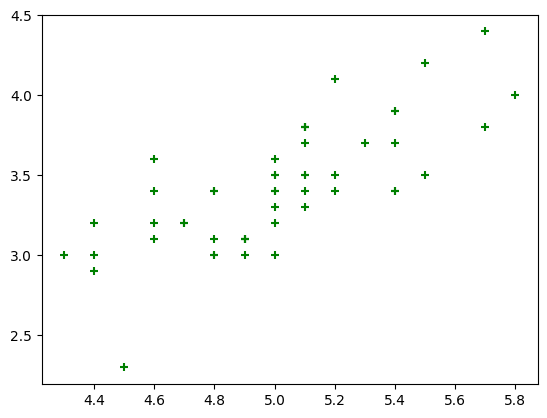

In [ ]:

import matplotlib.pyplot as plt
df0 = data[:50]
df1 = data[50:100]
df2 = data[100:150]


# x = data.iloc[:100,:2]
# y = data.target[:100]


plt.scatter(df0['sepal_length'],df0['sepal_width'],color='green',marker='+')

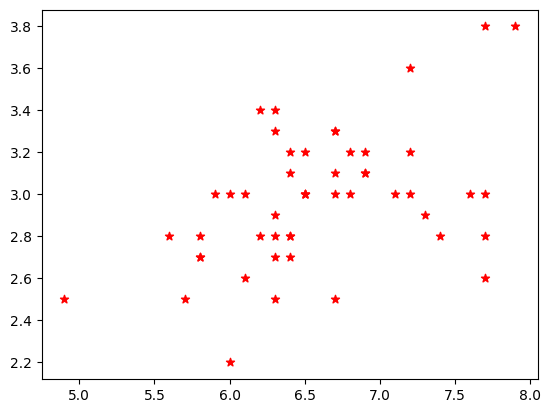

In [ ]:
plt.scatter(df2['sepal_length'],df2['sepal_width'],color='red',marker='*')


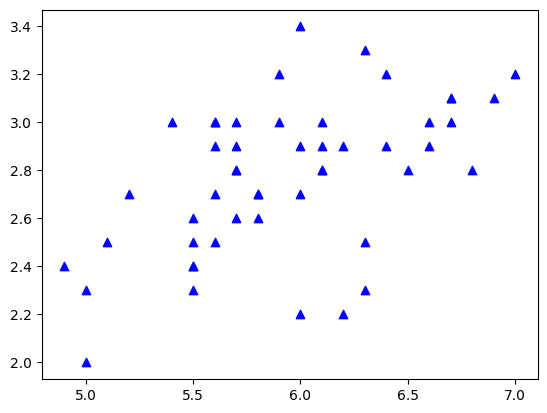

In [ ]:
plt.scatter(df1['sepal_length'],df1['sepal_width'],color='blue',marker='^')



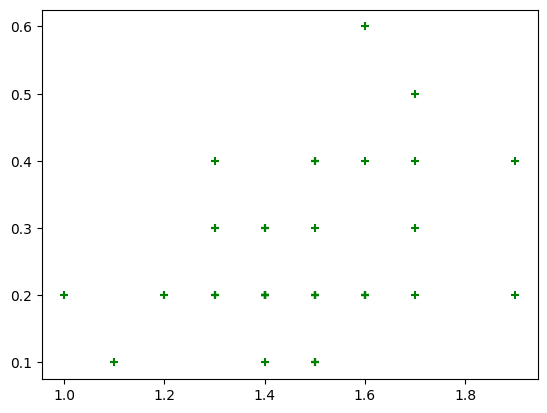

In [ ]:

plt.scatter(df0['petal_length'],df0['petal_width'],color='green',marker='+')


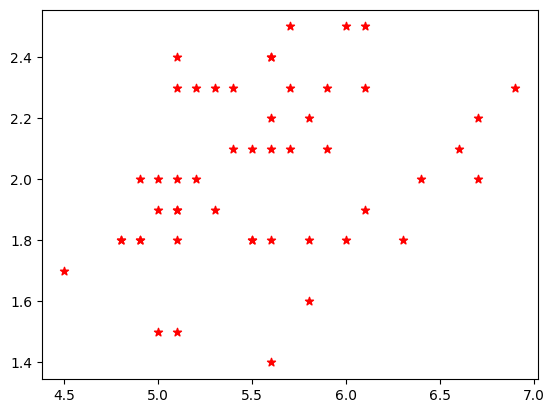

In [ ]:
plt.scatter(df2['petal_length'],df2['petal_width'],color='red',marker='*')


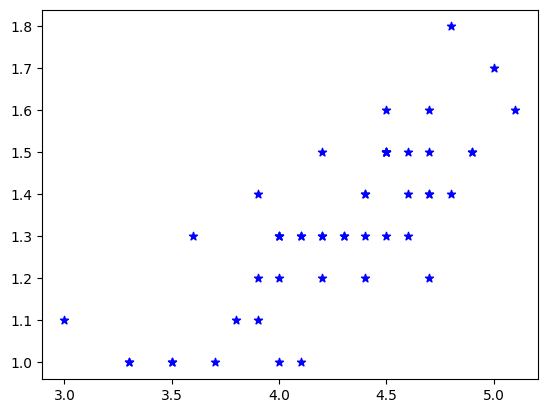

In [ ]:
plt.scatter(df1['petal_length'],df1['petal_width'],color='blue',marker='*')


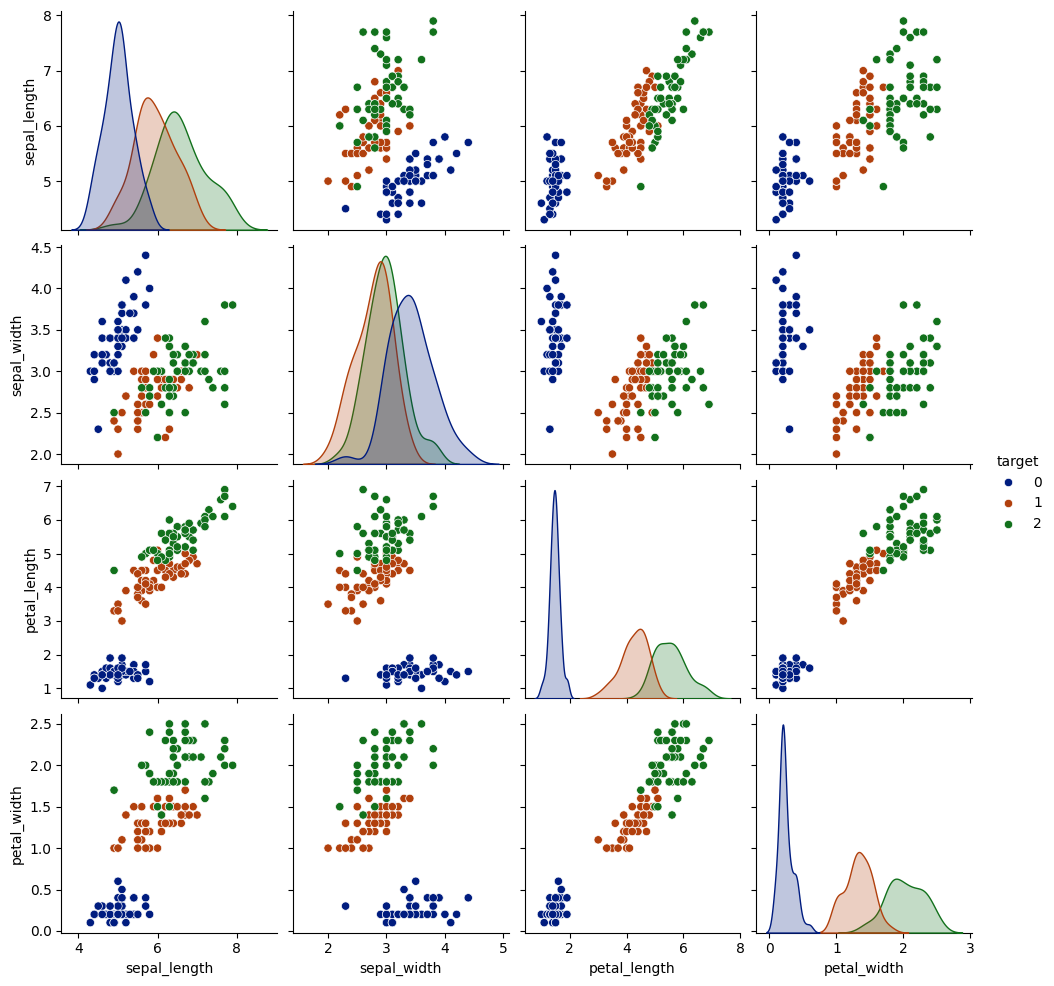

In [ ]:


import seaborn as sns
sns.pairplot(data,hue="target", palette="dark")


In [ ]:

import seaborn as sns
sns.pair

AttributeError: module 'seaborn' has no attribute 'pair'